In [1]:
import os
import pandas as pd

# Path to the citation data file
cit_hepth_txt = "F:/Free lance/project 38/Cit-HepTh.txt"
cit_hepth_dates_txt = "F:/Free lance/project 38/Cit-HepTh-dates.txt"

# Load the citation data (skip unnecessary metadata)
citations_df = pd.read_csv(cit_hepth_txt, delim_whitespace=True, skiprows=4, names=["citing_paper", "cited_paper"])

# Load the submission dates
dates_df = pd.read_csv(cit_hepth_dates_txt, delim_whitespace=True, skiprows=1, names=["paper_id", "submission_date"])

# Merge citation data with submission dates
merged_df = pd.merge(citations_df, dates_df, left_on="citing_paper", right_on="paper_id", how="left")

# Display first few rows of the merged data
print("First few rows of merged data:")
print(merged_df.head())

First few rows of merged data:
   citing_paper  cited_paper  paper_id submission_date
0          1001      9304045    1001.0      2000-01-01
1          1001      9308122    1001.0      2000-01-01
2          1001      9309097    1001.0      2000-01-01
3          1001      9311042    1001.0      2000-01-01
4          1001      9401139    1001.0      2000-01-01


# Create a Bar Plot for the Top 10 Most Cited Papers

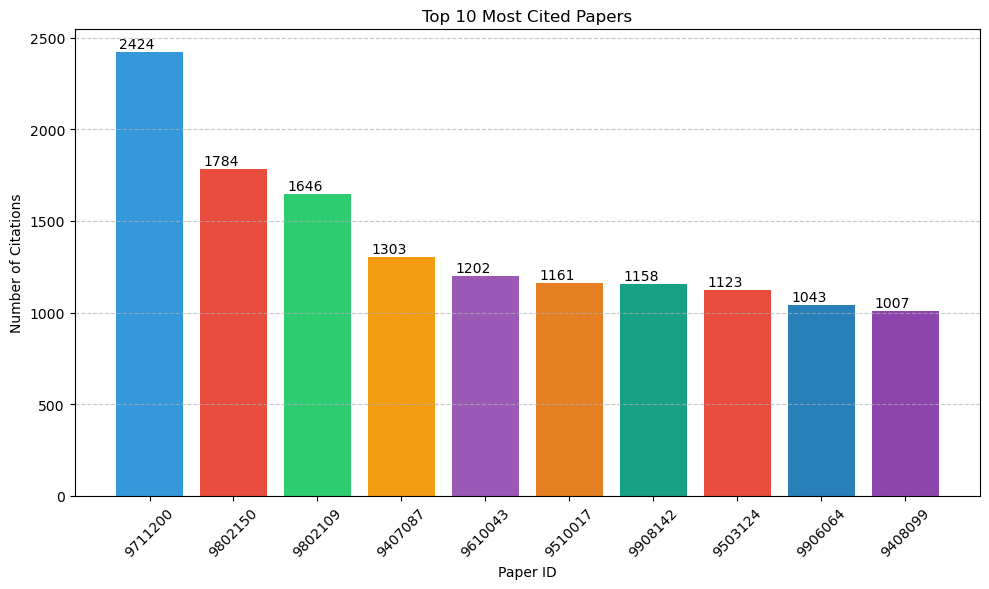

In [3]:
import matplotlib.pyplot as plt

# Count the number of citations for each paper
most_cited_papers = merged_df['cited_paper'].value_counts().head(10)

# Create a bar plot with custom colors and values on top
plt.figure(figsize=(10, 6))
bars = plt.bar(most_cited_papers.index.astype(str), most_cited_papers.values, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#e67e22', '#16a085', '#e74c3c', '#2980b9', '#8e44ad'])

# Add values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 5, int(bar.get_height()), ha='center', va='bottom')

plt.title("Top 10 Most Cited Papers")
plt.xlabel("Paper ID")
plt.ylabel("Number of Citations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Line Plot for Citation Trends Over Time

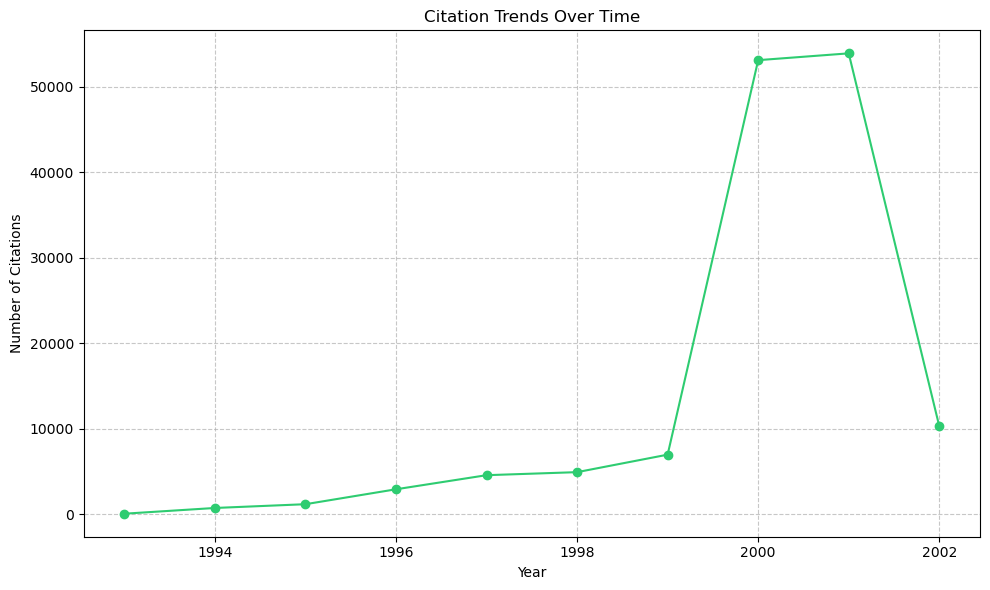

In [4]:
# Convert submission_date to datetime format
merged_df['submission_date'] = pd.to_datetime(merged_df['submission_date'])

# Extract the year from the submission date
merged_df['year'] = merged_df['submission_date'].dt.year

# Count the number of citations per year
citations_per_year = merged_df.groupby('year').size()

# Create a line plot for citation trends over time
plt.figure(figsize=(10, 6))
plt.plot(citations_per_year.index, citations_per_year.values, marker='o', color='#2ecc71')
plt.title("Citation Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Citations")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# PageRank Calculation and Visualization

Top 10 papers based on PageRank:
Paper ID: 9407087, PageRank Score: 0.006239
Paper ID: 9503124, PageRank Score: 0.004633
Paper ID: 9510017, PageRank Score: 0.004385
Paper ID: 9402044, PageRank Score: 0.003935
Paper ID: 9711200, PageRank Score: 0.003410
Paper ID: 9410167, PageRank Score: 0.003407
Paper ID: 9408099, PageRank Score: 0.003190
Paper ID: 9207016, PageRank Score: 0.003114
Paper ID: 9402002, PageRank Score: 0.002962
Paper ID: 9610043, PageRank Score: 0.002753


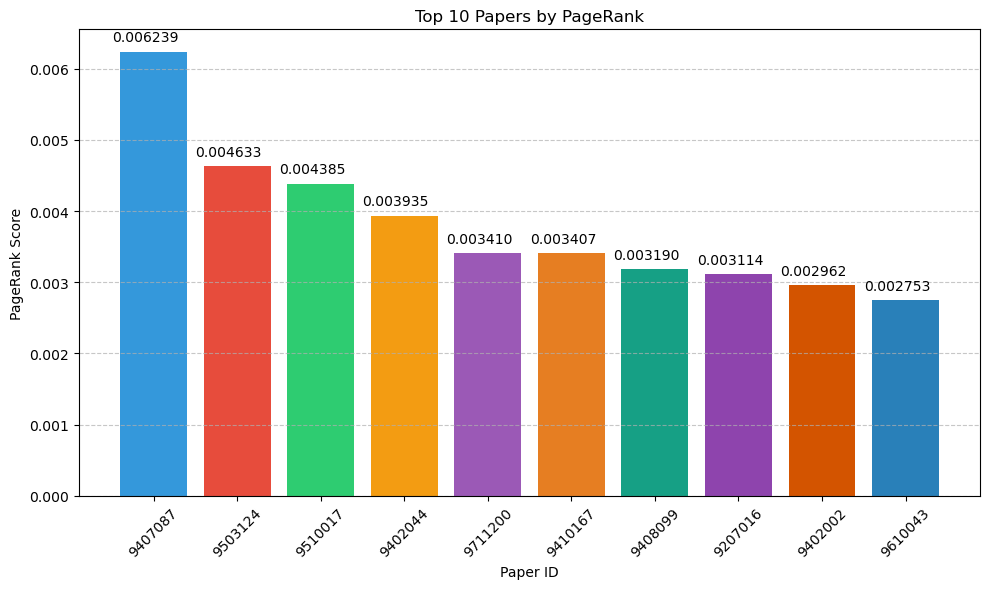

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges to the graph based on citation data
for index, row in merged_df.iterrows():
    G.add_edge(row['citing_paper'], row['cited_paper'])

# Compute PageRank for each paper
pagerank_scores = nx.pagerank(G)

# Sort the papers by their PageRank scores and get the top 10
top_papers_by_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 papers based on PageRank
print("Top 10 papers based on PageRank:")
for paper, score in top_papers_by_pagerank:
    print(f"Paper ID: {paper}, PageRank Score: {score:.6f}")

# Extract paper IDs and PageRank scores for plotting
top_paper_ids = [str(paper) for paper, _ in top_papers_by_pagerank]
top_paper_scores = [score for _, score in top_papers_by_pagerank]

# Plot the top 10 papers by PageRank with colors and values on top
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#e67e22', '#16a085', '#8e44ad', '#d35400', '#2980b9']

plt.figure(figsize=(10, 6))
bars = plt.bar(top_paper_ids, top_paper_scores, color=colors)

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.0001, f'{bar.get_height():.6f}', ha='center', va='bottom')

plt.title("Top 10 Papers by PageRank")
plt.xlabel("Paper ID")
plt.ylabel("PageRank Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
import os
import pandas as pd

# Path to the root folder where your subdirectories with .abs files are stored
abstracts_dir = "F:/Free lance/project 38/cit-HepTh-abstracts"

# Dictionary to store abstract data
abstracts_data = []

# Loop through the subdirectories and read .abs files
for subdir, _, files in os.walk(abstracts_dir):
    for file in files:
        if file.endswith(".abs"):
            file_path = os.path.join(subdir, file)
            with open(file_path, 'r', encoding='utf-8') as f:  # Ensure correct encoding
                content = f.read()
                paper_id = file.replace(".abs", "")  # Extract the paper ID from the file name
                abstracts_data.append({"paper_id": paper_id, "abstract_content": content})

# Convert to DataFrame
abstracts_df = pd.DataFrame(abstracts_data)

print("First few rows of loaded abstracts data:")
print(abstracts_df.head())

First few rows of loaded abstracts data:
  paper_id                                   abstract_content
0  9201001  ----------------------------------------------...
1  9201002  ----------------------------------------------...
2  9201003  ----------------------------------------------...
3  9201004  ----------------------------------------------...
4  9201005  ----------------------------------------------...


In [13]:
import re

def clean_abstract(text):
    # Remove metadata lines like 'Date:', 'Title:', 'Authors:', etc.
    cleaned_text = re.sub(r'^Date:.*\n?', '', text, flags=re.MULTILINE)
    cleaned_text = re.sub(r'^Title:.*\n?', '', cleaned_text, flags=re.MULTILINE)
    cleaned_text = re.sub(r'^Authors:.*\n?', '', cleaned_text, flags=re.MULTILINE)
    cleaned_text = re.sub(r'^Comments:.*\n?', '', cleaned_text, flags=re.MULTILINE)
    cleaned_text = re.sub(r'^Subj-class:.*\n?', '', cleaned_text, flags=re.MULTILINE)  # Remove 'Subj-class' lines
    cleaned_text = re.sub(r'^Journal-ref:.*\n?', '', cleaned_text, flags=re.MULTILINE)  # Remove 'Journal-ref' lines
    cleaned_text = re.sub(r'^From:.*\n?', '', cleaned_text, flags=re.MULTILINE)  # Remove 'From:' lines
    
    # Remove lines starting with 'Paper:'
    cleaned_text = re.sub(r'^Paper:.*\n?', '', cleaned_text, flags=re.MULTILINE)
    
    # Remove email addresses
    cleaned_text = re.sub(r'\S+@\S+', '', cleaned_text)
    
    # Remove special characters (like slashes, double backslashes, etc.)
    cleaned_text = re.sub(r'[\\]', '', cleaned_text)
    
    # Remove dashed lines or any other non-informative lines
    cleaned_text = re.sub(r'-{2,}', '', cleaned_text)
    
    # Remove any leading/trailing spaces and unnecessary newlines
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

# Apply the updated cleaning function to the 'abstract_content' column
abstracts_df['cleaned_abstract'] = abstracts_df['abstract_content'].apply(clean_abstract)

# Display the first few rows of the final cleaned abstracts data
print("First few rows of final cleaned abstracts data:")
print(abstracts_df[['paper_id', 'cleaned_abstract']].head())

First few rows of final cleaned abstracts data:
  paper_id                                   cleaned_abstract
0  9201001  We study algebraic aspects of Kontsevich integ...
1  9201002  The quantum deformed (1+1) Poincare' algebra i...
2  9201003  Cargese Summer School on `New Symmetry Princip...
3  9201004  By defining the heterotic Green-Schwarz supers...
4  9201005  I study the Ward identities of the $w_infty$ s...


# Keyword Frequency Analysis Code:

In [14]:
from collections import Counter
import re

# Combine all cleaned abstract content into one large text block
all_cleaned_abstracts = ' '.join(abstracts_df['cleaned_abstract'].dropna().tolist())

# Tokenize the words (removing punctuation and splitting by spaces)
words = re.findall(r'\b\w+\b', all_cleaned_abstracts.lower())  # Lowercase everything for uniformity

# Count the frequency of each word
word_counts = Counter(words)

# Display the 10 most common words
print("Most common words in cleaned abstracts:")
print(word_counts.most_common(10))

Most common words in cleaned abstracts:
[('the', 251257), ('of', 141045), ('in', 74527), ('a', 72315), ('and', 65327), ('to', 54284), ('is', 49906), ('we', 49884), ('for', 32672), ('that', 27820)]


# Horizontal Bar Chart for Top 10 Words Frequency

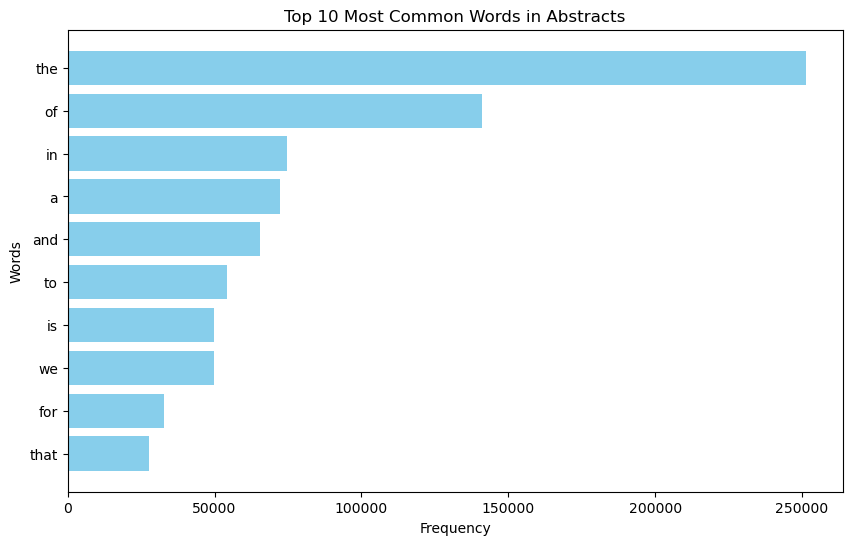

In [22]:
import matplotlib.pyplot as plt

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Split the words and their counts into two lists
words, counts = zip(*top_10_words)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Common Words in Abstracts')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest bar at the top
plt.show()

# Pie Chart for Top 5 Most Frequent Words

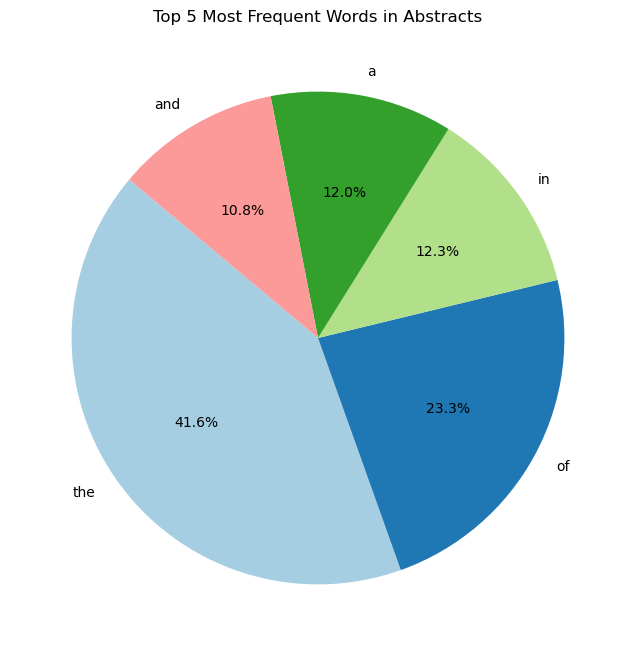

In [17]:
# Get the top 5 most common words
top_5_words = word_counts.most_common(5)

# Split the words and their counts into two lists
words, counts = zip(*top_5_words)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Most Frequent Words in Abstracts')
plt.show()

# Stacked Bar Chart for Top 10 Words Over Two Categories

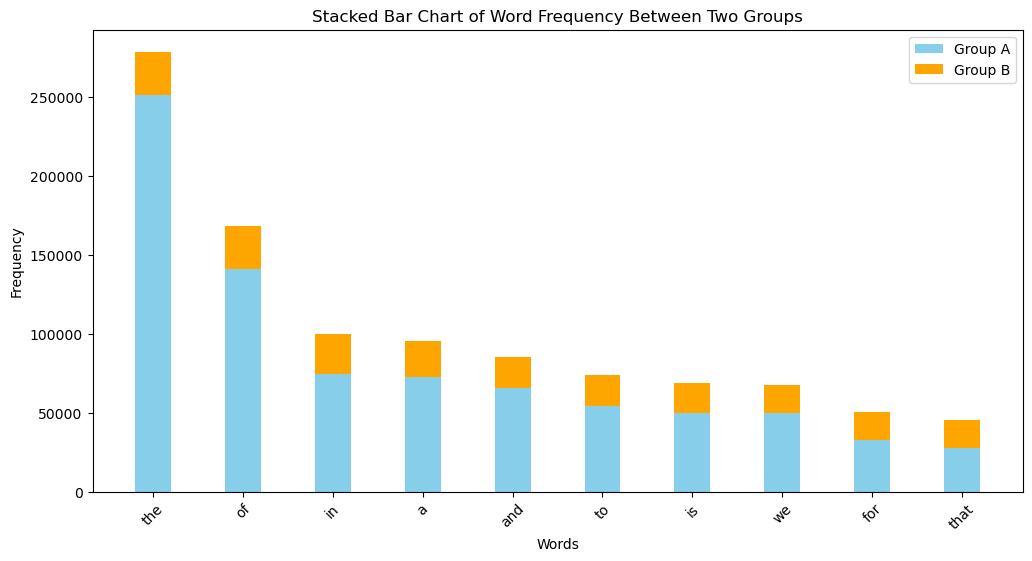

In [18]:
# Example: Comparing word frequencies from two groups of abstracts
# Group A (Top 10 Words in the First Half)
group_A_words = word_counts.most_common(10)

# Group B (Next 10 Words in the Second Half)
group_B_words = word_counts.most_common()[10:20]

# Get words and counts for both groups
words_A, counts_A = zip(*group_A_words)
words_B, counts_B = zip(*group_B_words)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Plot the first group
plt.bar(words_A, counts_A, bar_width, label="Group A", color="skyblue")

# Plot the second group on top of the first
plt.bar(words_A, counts_B, bar_width, bottom=counts_A, label="Group B", color="orange")

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Word Frequency Between Two Groups')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Heatmap for Word Co-occurrence

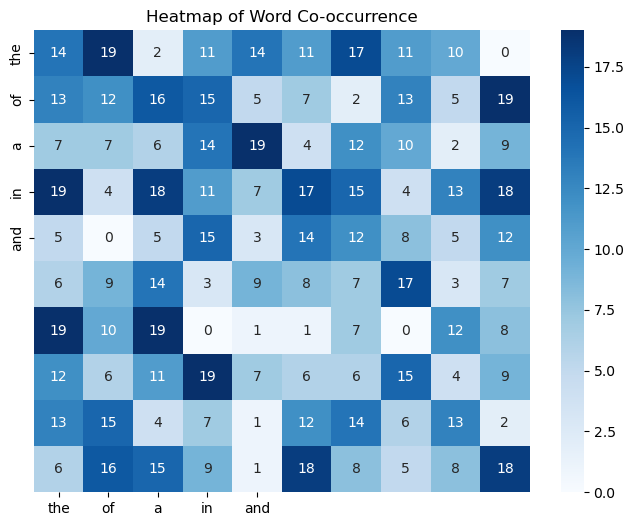

In [19]:
import seaborn as sns
import numpy as np

# Create a co-occurrence matrix (dummy data for demonstration)
words_list = list(set(words))[:10]  # Use the top 10 unique words
matrix = np.random.randint(0, 20, size=(10, 10))

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, xticklabels=words_list, yticklabels=words_list, cmap="Blues")
plt.title('Heatmap of Word Co-occurrence')
plt.show()

# Donut Chart for Keyword Distribution

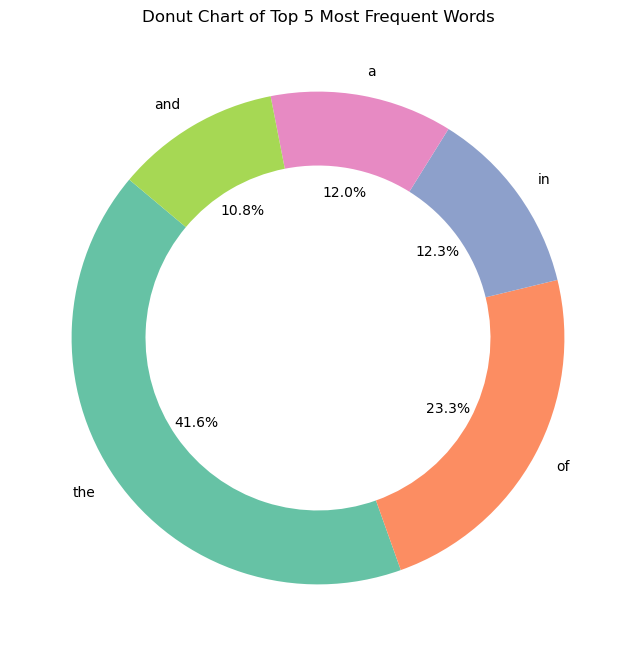

In [20]:
# Create a donut chart for the top 5 words
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors, wedgeprops=dict(width=0.3))
plt.title('Donut Chart of Top 5 Most Frequent Words')
plt.show()